<h1>Image Datasets and Transforms</h1> 

Torchvision Transforms to that dataset.</p>
<ul>
    <li><a href="#auxiliary"> Auxiliary Functions </a></li>
    <li><a href="#Dataset"> Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
    <li><a href="#Prebuilt_Dataset">Prebuilt Datasets</a></li>
</ul>

Download the dataset and unzip the files in your data directory, **to download faster this dataset has only 100 samples**:

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz -P /data

In [65]:
!tar -xf /data/img.tar.gz 

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv 

In [64]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [62]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os
torch.manual_seed(0)

<h2 id="auxiliary">Auxiliary Functions</h2>

 The path to the csv file with the labels for each image.

In [35]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.

In [36]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 

In [28]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


As the class of the sample is in the first column, you can also obtain the class value as follows.

In [29]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [30]:
# the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


<h2 id="load_image">Load Image</h2>

To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, you will store the result in the variable <code>image_name</code>

In [31]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [32]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class .

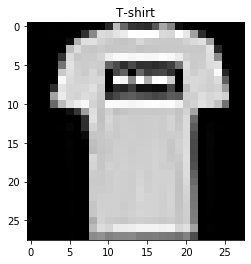

In [37]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

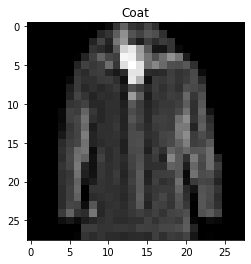

In [38]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

<h2 id="data_class">Create a Dataset Class</h2>

In [39]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [40]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.

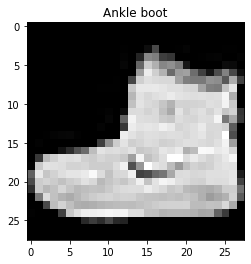

In [42]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

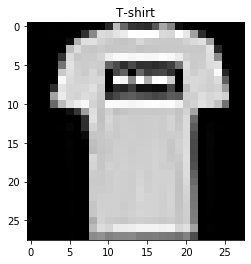

In [45]:
# ploting the second image

image=dataset[1][0]
y=dataset[1][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>

In [46]:
import torchvision.transforms as transforms

We can apply some image transform functions on the dataset object. The iamge can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.

In [47]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


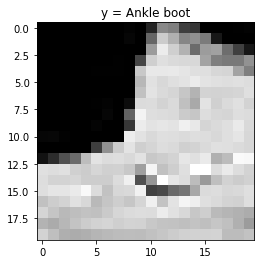

In [48]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

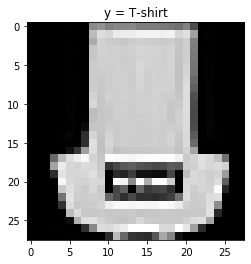

In [49]:
# Construct the compose to Vertically flip the image. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

Using the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).

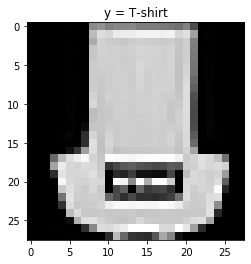

In [50]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

<h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2> 

In [59]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [51]:
import torchvision.datasets as dsets

In [52]:
# Import the prebuilt dataset into variable dataset

dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

0it [00:00, ?it/s]

9920512it [00:06, 1615807.32it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 68845.50it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:01, 936447.77it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 27778.08it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [53]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.

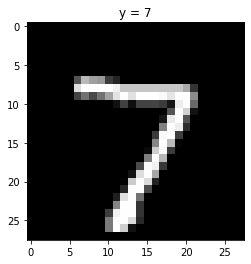

In [60]:
# Plot the first element in the dataset

show_data(dataset[0])

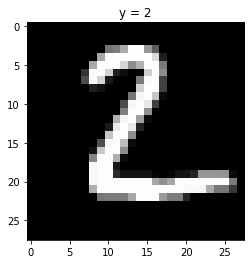

In [61]:
# Plot the second element in the dataset

show_data(dataset[1])